In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sn                   # For plotting graphs
import io
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
filepath2 = r"C:\Users\91623\OneDrive\Desktop\cpa_forger_direct\finalquan.xlsx"
df= pd.read_excel(filepath2)
print(df)

        LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0                 1000 2018-10-17          1       1         5   
1                 1002 2018-09-16          1       2        58   
2                 1003 2019-03-07          1       3        52   
3                 1003 2019-03-08          1       4       106   
4                 1004 2018-11-02          1       5        96   
...                ...        ...        ...     ...       ...   
264829         2370701 2018-12-08         88  240378        24   
264830         2370751 2018-10-01         88  240394        60   
264831         2370961 2018-10-24         88  240480        70   
264832         2370961 2018-10-27         88  240481        65   
264833         2373711 2018-12-14         88  241815        16   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1          Red Rock Deli Chikn&Garlic Aioli 150g         1   

In [3]:
df.head()

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0            1000 2018-10-17          1       1         5   
1            1002 2018-09-16          1       2        58   
2            1003 2019-03-07          1       3        52   
3            1003 2019-03-08          1       4       106   
4            1004 2018-11-02          1       5        96   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7        150   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6        210   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0        175   
4          WW Original Stacked Chips 160g         1        1.9        160   

        BRAND              LIFESTAGE PREMIUM_CUSTOMER  
0     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1         RRD  YOUNG SINGLES/COUPLES       Mainstream  
2     GRNWVES         YOUNG FAMILIES           Budget  
3     NATURAL         YOUNG FAMILIES           Budget  
4  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream

In [4]:
df.shape

(264834, 12)

In [5]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

PROD_QTY has 5 unique values : [2 1 4 3 5] 

PACK_SIZE has 21 unique values : [175 150 210 160 165 110 330 170 300 180 135  70 220 190 270  90 200 134
 380 125 250] 

BRAND has 21 unique values : ['NATURAL' 'RRD' 'GRNWVES' 'WOOLWORTHS' 'CHEETOS' 'INFUZIONS' 'DORITOS'
 'OLD' 'SMITHS' 'KETTLE' 'CCS' 'TOSTITOS' 'COBS' 'BURGER' 'THINS'
 'TYRRELLS' 'CHEEZELS' 'TWISTIES' 'SUNBITES' 'PRINGLES' 'FRENCH'] 

LIFESTAGE has 7 unique values : ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 

PREMIUM_CUSTOMER has 3 unique values : ['Premium' 'Mainstream' 'Budget'] 



In [6]:
df.columns = df.columns.str.lower()

In [7]:
df['brand'].replace(to_replace=['Red'] , value='RRD', inplace=True)
df['brand'].replace(to_replace=['WW'] , value='Woolworths', inplace=True)
df['brand'].replace(to_replace=['Smith'] , value='Smiths', inplace=True)
df['brand'].replace(to_replace=['Dorito'] , value='Doritos', inplace=True)
df['brand'].replace(to_replace=['Snbts'] , value='Sunbites', inplace=True)
df['brand'].replace(to_replace=['Infzns'] , value='Infuzions', inplace=True)
df['brand'].replace(to_replace=['GrnWves','GRNWVES'] , value='Grain', inplace=True)

In [8]:
df.head()

lylty_card_nbr       date  store_nbr  txn_id  prod_nbr  \
0            1000 2018-10-17          1       1         5   
1            1002 2018-09-16          1       2        58   
2            1003 2019-03-07          1       3        52   
3            1003 2019-03-08          1       4       106   
4            1004 2018-11-02          1       5        96   

                                prod_name  prod_qty  tot_sales  pack_size  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7        150   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6        210   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0        175   
4          WW Original Stacked Chips 160g         1        1.9        160   

        brand              lifestage premium_customer  
0     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1         RRD  YOUNG SINGLES/COUPLES       Mainstream  
2       Grain         YOUNG FAMILIES           Budget  
3     NATURAL         YOUNG FAMILIES           Budget  
4  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream

In [9]:
df.shape



(264834, 12)

<AxesSubplot:ylabel='tot_sales'>

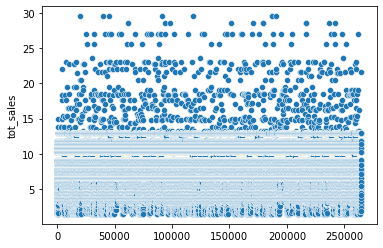

In [10]:
sns.scatterplot(data =df['tot_sales'])

In [11]:
df = df.drop(df[df['tot_sales']>100].index)

<AxesSubplot:ylabel='tot_sales'>

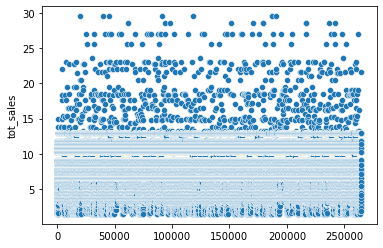

In [12]:
sns.scatterplot(data =df['tot_sales'])

<AxesSubplot:ylabel='date'>

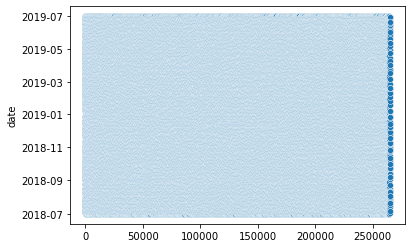

In [13]:
sns.scatterplot(data =df['date'])

In [14]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

prod_qty has 5 unique values : [2 1 4 3 5] 

pack_size has 21 unique values : [175 150 210 160 165 110 330 170 300 180 135  70 220 190 270  90 200 134
 380 125 250] 

brand has 21 unique values : ['NATURAL' 'RRD' 'Grain' 'WOOLWORTHS' 'CHEETOS' 'INFUZIONS' 'DORITOS'
 'OLD' 'SMITHS' 'KETTLE' 'CCS' 'TOSTITOS' 'COBS' 'BURGER' 'THINS'
 'TYRRELLS' 'CHEEZELS' 'TWISTIES' 'SUNBITES' 'PRINGLES' 'FRENCH'] 

lifestage has 7 unique values : ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 

premium_customer has 3 unique values : ['Premium' 'Mainstream' 'Budget'] 



In [15]:
df.head()

lylty_card_nbr       date  store_nbr  txn_id  prod_nbr  \
0            1000 2018-10-17          1       1         5   
1            1002 2018-09-16          1       2        58   
2            1003 2019-03-07          1       3        52   
3            1003 2019-03-08          1       4       106   
4            1004 2018-11-02          1       5        96   

                                prod_name  prod_qty  tot_sales  pack_size  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7        150   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6        210   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0        175   
4          WW Original Stacked Chips 160g         1        1.9        160   

        brand              lifestage premium_customer  
0     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1         RRD  YOUNG SINGLES/COUPLES       Mainstream  
2       Grain         YOUNG FAMILIES           Budget  
3     NATURAL         YOUNG FAMILIES           Budget  
4  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream

In [16]:
df.shape

(264834, 12)

In [17]:
 df.to_excel('clean_quan.xlsx', index=False)

In [18]:
df.isnull().sum()

lylty_card_nbr      0
date                0
store_nbr           0
txn_id              0
prod_nbr            0
prod_name           0
prod_qty            0
tot_sales           0
pack_size           0
brand               0
lifestage           0
premium_customer    0
dtype: int64

In [19]:
df.dropna()

lylty_card_nbr       date  store_nbr  txn_id  prod_nbr  \
0                 1000 2018-10-17          1       1         5   
1                 1002 2018-09-16          1       2        58   
2                 1003 2019-03-07          1       3        52   
3                 1003 2019-03-08          1       4       106   
4                 1004 2018-11-02          1       5        96   
...                ...        ...        ...     ...       ...   
264829         2370701 2018-12-08         88  240378        24   
264830         2370751 2018-10-01         88  240394        60   
264831         2370961 2018-10-24         88  240480        70   
264832         2370961 2018-10-27         88  240481        65   
264833         2373711 2018-12-14         88  241815        16   

                                       prod_name  prod_qty  tot_sales  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1          Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7   
2          Grain Waves Sour    Cream&Chives 210G         1        3.6   
3         Natural ChipCo      Hony Soy Chckn175g         1        3.0   
4                 WW Original Stacked Chips 160g         1        1.9   
...                                          ...       ...        ...   
264829     Grain Waves         Sweet Chilli 210g         2        7.2   
264830      Kettle Tortilla ChpsFeta&Garlic 150g         2        9.2   
264831   Tyrrells Crisps     Lightly Salted 165g         2        8.4   
264832  Old El Paso Salsa   Dip Chnky Tom Ht300g         2       10.2   
264833  Smiths Crinkle Chips Salt & Vinegar 330g         2       11.4   

        pack_size       brand              lifestage premium_customer  
0             175     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1             150         RRD  YOUNG SINGLES/COUPLES       Mainstream  
2             210       Grain         YOUNG FAMILIES           Budget  
3             175     NATURAL         YOUNG FAMILIES           Budget  
4             160  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream  
...           ...         ...                    ...              ...  
264829        210       Grain         YOUNG FAMILIES       Mainstream  
264830        150      KETTLE         YOUNG FAMILIES          Premium  
264831        165    TYRRELLS         OLDER FAMILIES           Budget  
264832        300         OLD         OLDER FAMILIES           Budget  
264833        330      SMITHS  YOUNG SINGLES/COUPLES       Mainstream  

[264834 rows x 12 columns]

In [20]:
df2 = df[df['prod_name'].str.contains('Salsa') == False].copy()
df3 = df2[df2['prod_name'].str.contains('Jam') == False].copy()
df= df3.copy()

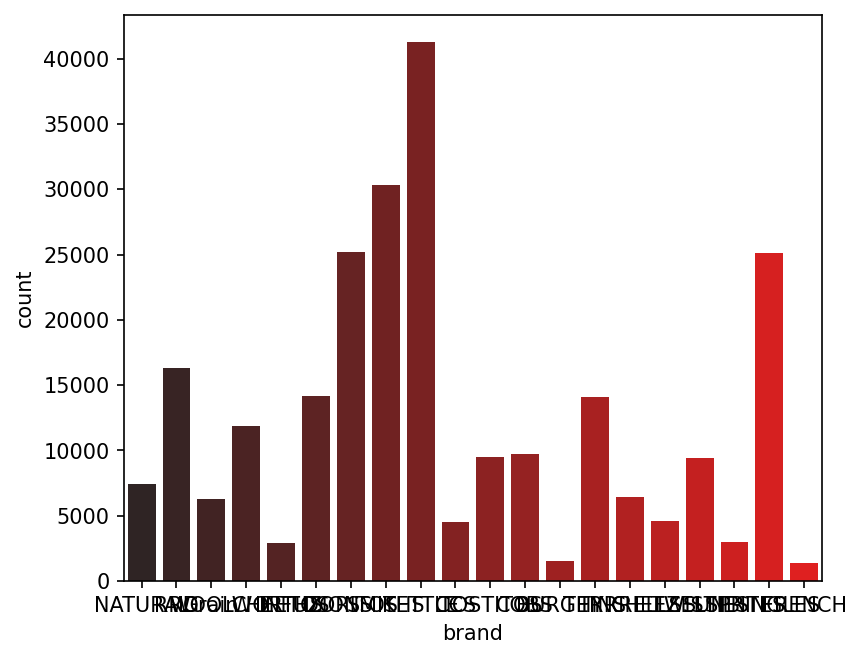

In [21]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=150)

sns.countplot(df['brand'],palette='dark:r');


In [22]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print("we have {} numerical features out of {}".format(len(numerical_features),len(df.columns)))

we have 8 numerical features out of 12


In [23]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("we have {} discrete features out of {} total features".format(len(discrete_features),len(df.columns)))

we have 2 discrete features out of 12 total features


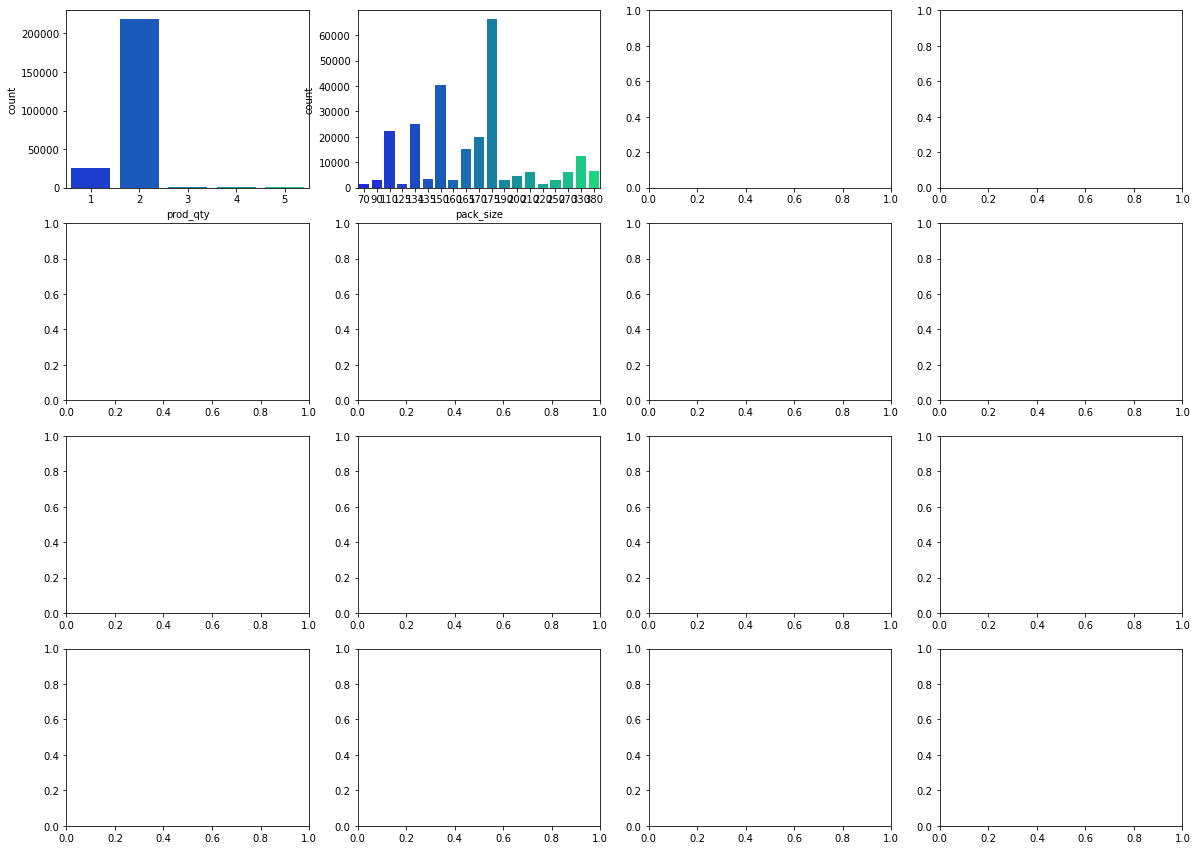

In [24]:
fig,ax = plt.subplots(4,4,figsize=(20,15))
for variable, subplot in zip(discrete_features,ax.flatten()):
    sns.countplot(df[variable],ax=subplot,palette="winter")

In [25]:
continuos_features = [feature for feature in numerical_features if feature not in discrete_features]
print("we have {} continuos features out of {} total features".format(len(continuos_features),len(df.columns)))

we have 6 continuos features out of 12 total features


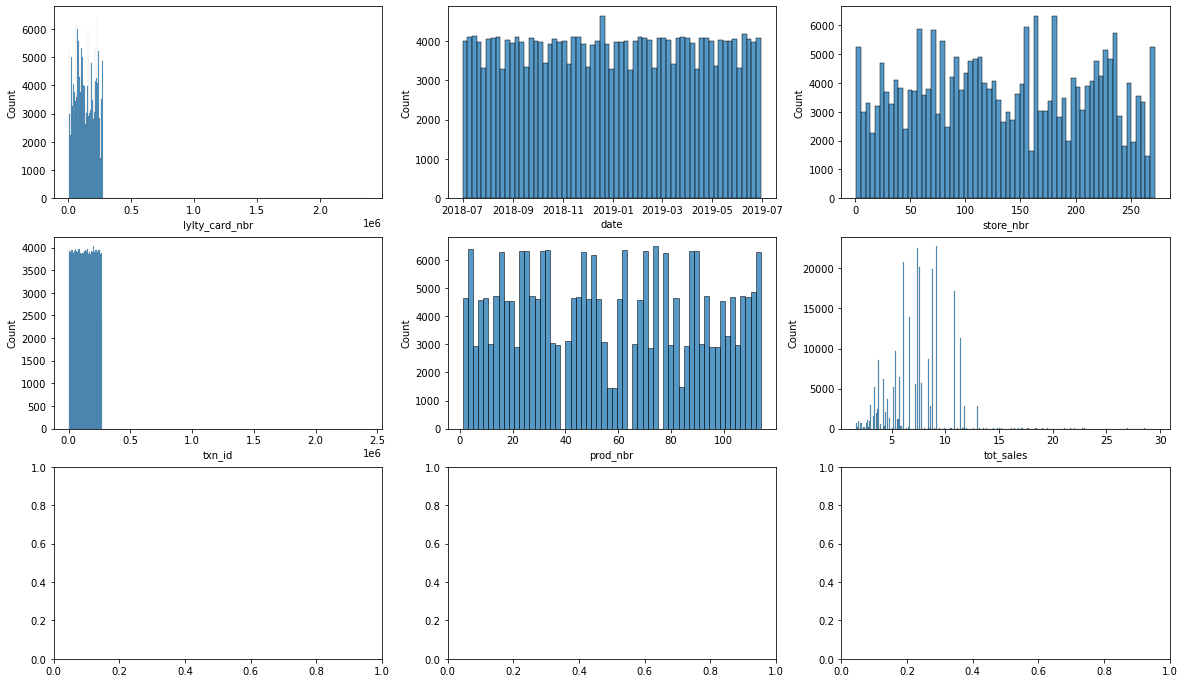

In [26]:
fig,ax = plt.subplots(3,3,figsize=(20,12))
for variable, subplot in zip(continuos_features,ax.flatten()):
    sns.histplot(df[variable],ax=subplot,palette="winter")

In [27]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
print("we have {} continuos features out of {} features".format(len(categorical_features),len(df.columns)))

we have 4 continuos features out of 12 features


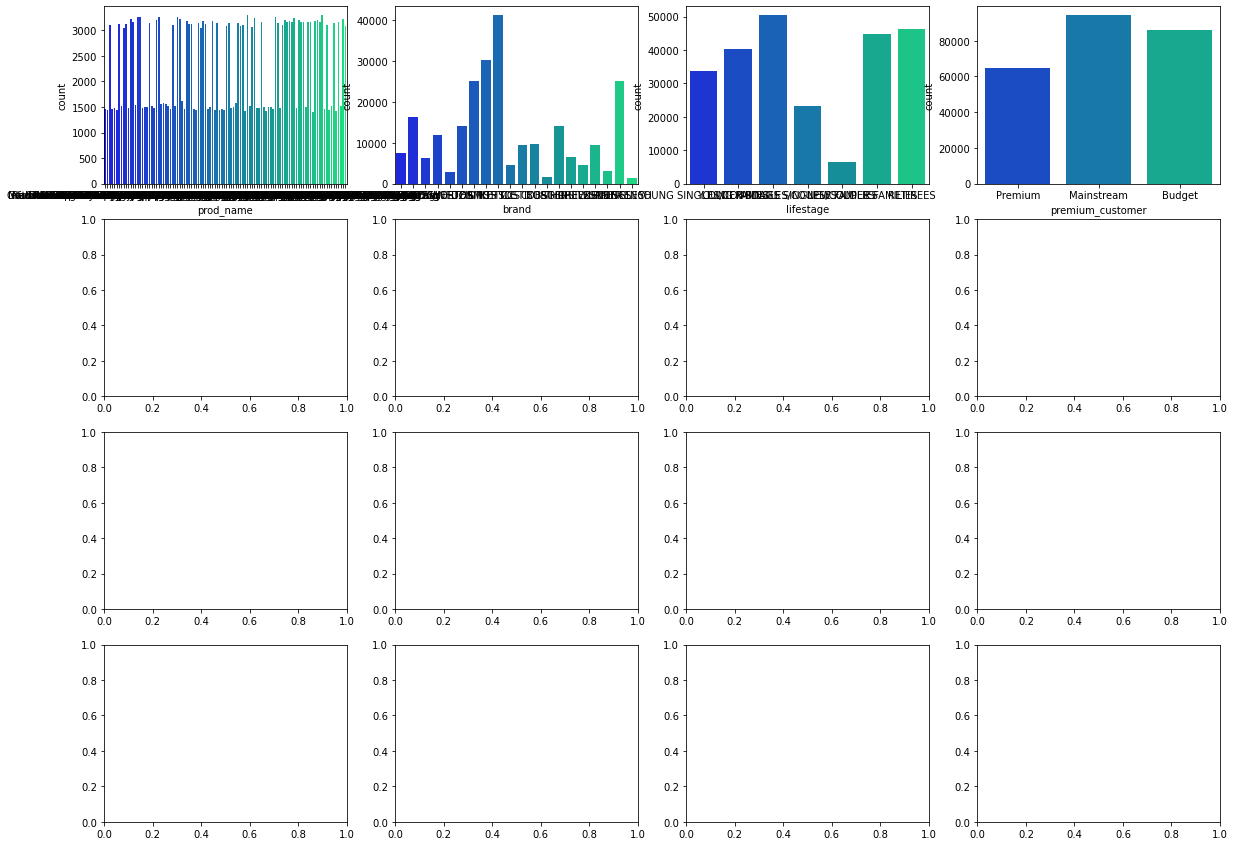

In [28]:
fig,ax = plt.subplots(4,4,figsize=(20,15))
for variable, subplot in zip(categorical_features,ax.flatten()):
    sns.countplot(df[variable],ax=subplot,palette="winter")

In [29]:
df1=df[['store_nbr','prod_name','prod_qty','tot_sales','pack_size','brand','lifestage','premium_customer']]

In [30]:
df1.head()

store_nbr                               prod_name  prod_qty  tot_sales  \
0          1  Natural Chip        Compny SeaSalt175g         2        6.0   
1          1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7   
2          1   Grain Waves Sour    Cream&Chives 210G         1        3.6   
3          1  Natural ChipCo      Hony Soy Chckn175g         1        3.0   
4          1          WW Original Stacked Chips 160g         1        1.9   

   pack_size       brand              lifestage premium_customer  
0        175     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1        150         RRD  YOUNG SINGLES/COUPLES       Mainstream  
2        210       Grain         YOUNG FAMILIES           Budget  
3        175     NATURAL         YOUNG FAMILIES           Budget  
4        160  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream

In [31]:
bydate = df.groupby('date')[['txn_id']].count().reset_index()

In [32]:

fig = px.line(bydate,bydate['date'],bydate['txn_id'])
fig.update_layout(title='Transactions over time',title_x=0.5)

In [33]:
december = bydate[bydate['date'].isin(list(bydate['date'][151:181]))]
fig = px.bar(december,december['date'],december['txn_id'])
fig.update_layout(title='Transactions of December 2018',title_x=0.5)

In [34]:
fig = px.histogram(df['pack_size'])
fig.update_layout(title='Histogram of Transaction Data',title_x=0.5)

In [35]:
df['brand'].value_counts()

KETTLE        41288
SMITHS        30353
DORITOS       25224
PRINGLES      25102
RRD           16321
INFUZIONS     14201
THINS         14075
WOOLWORTHS    11836
COBS           9693
TOSTITOS       9471
TWISTIES       9454
NATURAL        7469
TYRRELLS       6442
Grain          6272
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
FRENCH         1418
Name: brand, dtype: int64

In [36]:
df.describe()

lylty_card_nbr      store_nbr        txn_id       prod_nbr  \
count    2.452720e+05  245272.000000  2.452720e+05  245272.000000   
mean     1.355274e+05     135.045505  1.351258e+05      56.186736   
std      8.074396e+04      76.793076  7.815565e+04      33.727760   
min      1.000000e+03       1.000000  1.000000e+00       1.000000   
25%      7.001000e+04      70.000000  6.753975e+04      26.000000   
50%      1.303690e+05     130.000000  1.351895e+05      52.000000   
75%      2.030822e+05     203.000000  2.026452e+05      87.000000   
max      2.373711e+06     272.000000  2.415841e+06     114.000000   

            prod_qty      tot_sales      pack_size  
count  245272.000000  245272.000000  245272.000000  
mean        1.906598       7.324967     175.557088  
std         0.342294       2.478010      59.608725  
min         1.000000       1.700000      70.000000  
25%         2.000000       5.800000     150.000000  
50%         2.000000       7.400000     170.000000  
75%         2.000000       8.800000     175.000000  
max         5.000000      29.500000     380.000000

In [37]:
byc = df.groupby(['lifestage','premium_customer'])[['tot_sales']].sum().reset_index()

In [38]:
fig = px.bar(byc,byc['lifestage'],byc['tot_sales'],byc['premium_customer'],text=(byc['tot_sales']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='Proportion of Sales',title_x=0.5)

fig.show()

In [39]:
byc = df.groupby(['lifestage','premium_customer'])[['lylty_card_nbr']].sum().reset_index()

In [40]:
fig = px.bar(byc,byc['lifestage'],byc['lylty_card_nbr'],byc['premium_customer'],text=(byc['lylty_card_nbr']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='Proportion of Sales',title_x=0.5)

fig.show()

In [41]:
unique_cust = df[df['lylty_card_nbr'].isin(list(pd.unique(df['lylty_card_nbr'])))].copy()
byc = unique_cust.groupby(['lifestage','premium_customer'])[['prod_qty','lylty_card_nbr']].sum().reset_index()
byc['AVG'] = byc['prod_qty'] / byc['lylty_card_nbr']

In [42]:
fig = px.bar(byc,byc['lifestage'],byc['AVG'],byc['premium_customer'])
# Change the bar mode
fig.update_layout(barmode='group',title='AVG Units per customer',title_x=0.5)
fig.show()

In [43]:
df1=df[['store_nbr','prod_qty','tot_sales','pack_size','brand','lifestage','premium_customer']].copy()

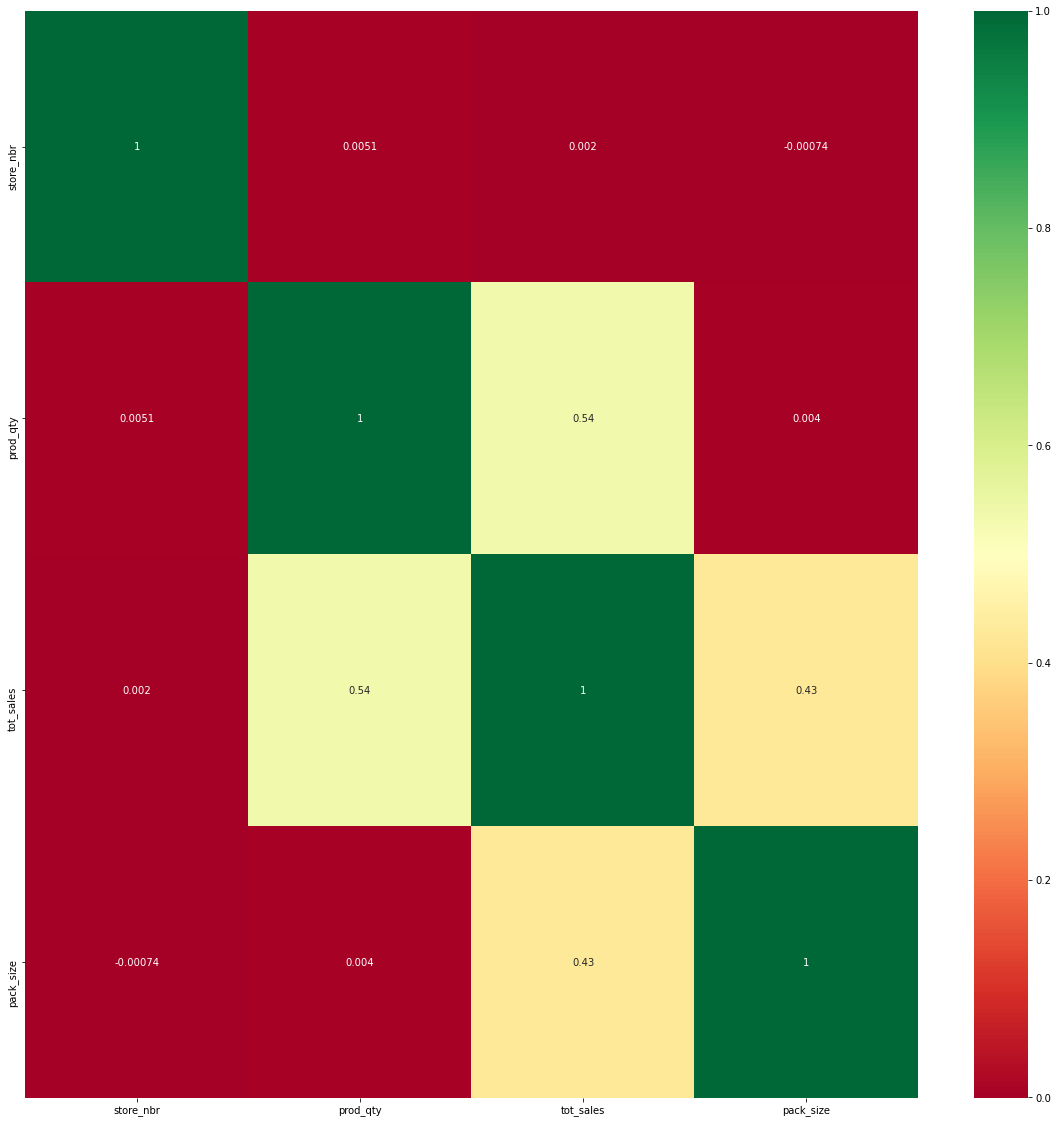

In [44]:
corrmat=df1.corr()
top_corr=corrmat.index
plt.figure(figsize=(20,20))
g= sns.heatmap(df1[top_corr].corr(),annot= True,cmap="RdYlGn")

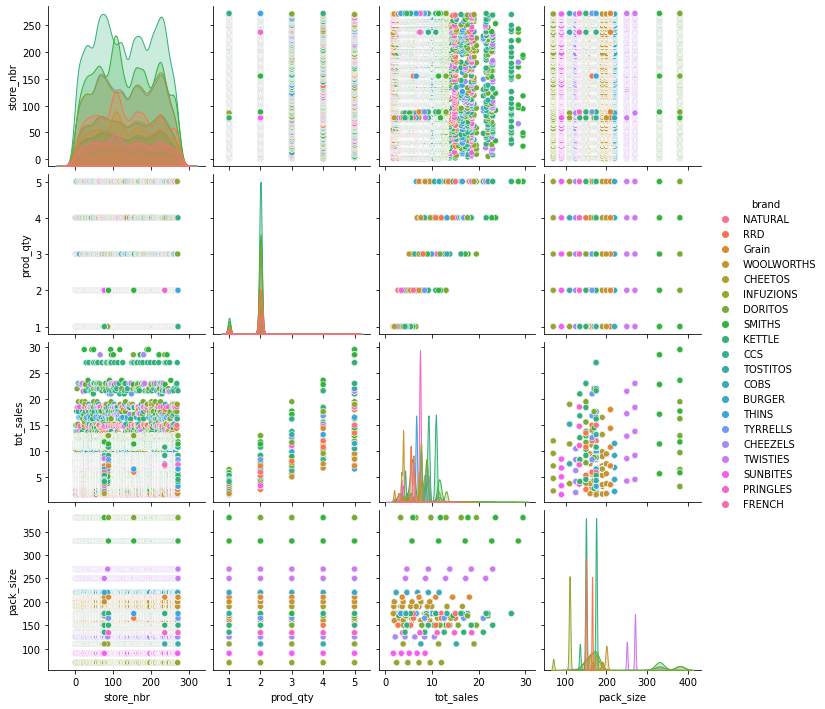

In [45]:
sns.pairplot(df1,hue='brand')

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245272 entries, 0 to 264833
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   store_nbr         245272 non-null  int64  
 1   prod_qty          245272 non-null  int64  
 2   tot_sales         245272 non-null  float64
 3   pack_size         245272 non-null  int64  
 4   brand             245272 non-null  object 
 5   lifestage         245272 non-null  object 
 6   premium_customer  245272 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 25.0+ MB


In [47]:
df1.head()

store_nbr  prod_qty  tot_sales  pack_size       brand  \
0          1         2        6.0        175     NATURAL   
1          1         1        2.7        150         RRD   
2          1         1        3.6        210       Grain   
3          1         1        3.0        175     NATURAL   
4          1         1        1.9        160  WOOLWORTHS   

               lifestage premium_customer  
0  YOUNG SINGLES/COUPLES          Premium  
1  YOUNG SINGLES/COUPLES       Mainstream  
2         YOUNG FAMILIES           Budget  
3         YOUNG FAMILIES           Budget  
4  OLDER SINGLES/COUPLES       Mainstream

In [48]:
object_feat = [feature for feature in df1.columns if df1[feature].dtype == "O"]
df1[object_feat].head()

brand              lifestage premium_customer
0     NATURAL  YOUNG SINGLES/COUPLES          Premium
1         RRD  YOUNG SINGLES/COUPLES       Mainstream
2       Grain         YOUNG FAMILIES           Budget
3     NATURAL         YOUNG FAMILIES           Budget
4  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in object_feat:
    df1[i] = df1[[i]].apply(le.fit_transform)

In [50]:
df1.head()

store_nbr  prod_qty  tot_sales  pack_size  brand  lifestage  \
0          1         2        6.0        175     10          6   
1          1         1        2.7        150     12          6   
2          1         1        3.6        210      7          5   
3          1         1        3.0        175     10          5   
4          1         1        1.9        160     19          3   

   premium_customer  
0                 2  
1                 1  
2                 0  
3                 0  
4                 1

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df5 = scaler.fit_transform(df1)

In [52]:
df5 = pd.DataFrame(df5,columns = df1.columns)

In [53]:
df5

store_nbr  prod_qty  tot_sales  pack_size     brand  lifestage  \
0       -1.745545  0.272872  -0.534691  -0.009346 -0.110085   1.481020   
1       -1.745545 -2.648598  -1.866407  -0.428748  0.334072   1.481020   
2       -1.745545 -2.648598  -1.503212   0.577818 -0.776321   0.909299   
3       -1.745545 -2.648598  -1.745342  -0.009346 -0.110085   0.909299   
4       -1.745545 -2.648598  -2.189248  -0.260987  1.888622  -0.234143   
...           ...       ...        ...        ...       ...        ...   
245267  -0.612628  0.272872   2.290162   3.429755 -1.220478  -1.949307   
245268  -0.612628  0.272872  -0.050430   0.577818 -0.776321   0.909299   
245269  -0.612628  0.272872   0.756670  -0.428748 -0.332164   0.909299   
245270  -0.612628  0.272872   0.433830  -0.177107  1.666544  -0.805864   
245271  -0.612628  0.272872   1.644481   2.590950  0.556151   1.481020   

        premium_customer  
0               1.397261  
1               0.113524  
2              -1.170213  
3              -1.170213  
4               0.113524  
...                  ...  
245267          0.113524  
245268          0.113524  
245269          1.397261  
245270         -1.170213  
245271          0.113524  

[245272 rows x 7 columns]

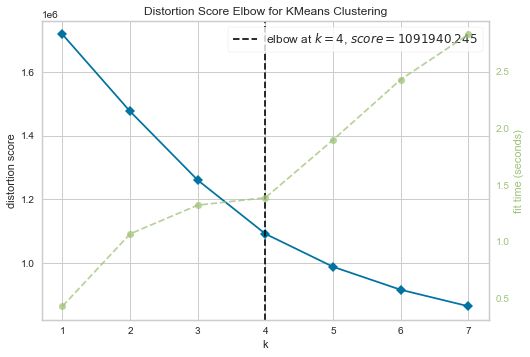

In [54]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(df5)
visualizer.show();

In [55]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)
pred_kmeans = kmeans.fit_predict(df5)

In [56]:
df['pred_kmeans'] = pred_kmeans+1
df.head()

lylty_card_nbr       date  store_nbr  txn_id  prod_nbr  \
0            1000 2018-10-17          1       1         5   
1            1002 2018-09-16          1       2        58   
2            1003 2019-03-07          1       3        52   
3            1003 2019-03-08          1       4       106   
4            1004 2018-11-02          1       5        96   

                                prod_name  prod_qty  tot_sales  pack_size  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7        150   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6        210   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0        175   
4          WW Original Stacked Chips 160g         1        1.9        160   

        brand              lifestage premium_customer  pred_kmeans  
0     NATURAL  YOUNG SINGLES/COUPLES          Premium            2  
1         RRD  YOUNG SINGLES/COUPLES       Mainstream            4  
2       Grain         YOUNG FAMILIES           Budget            4  
3     NATURAL         YOUNG FAMILIES           Budget            4  
4  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream            4

In [57]:
personal = df[['premium_customer','premium_customer','brand','lifestage']]

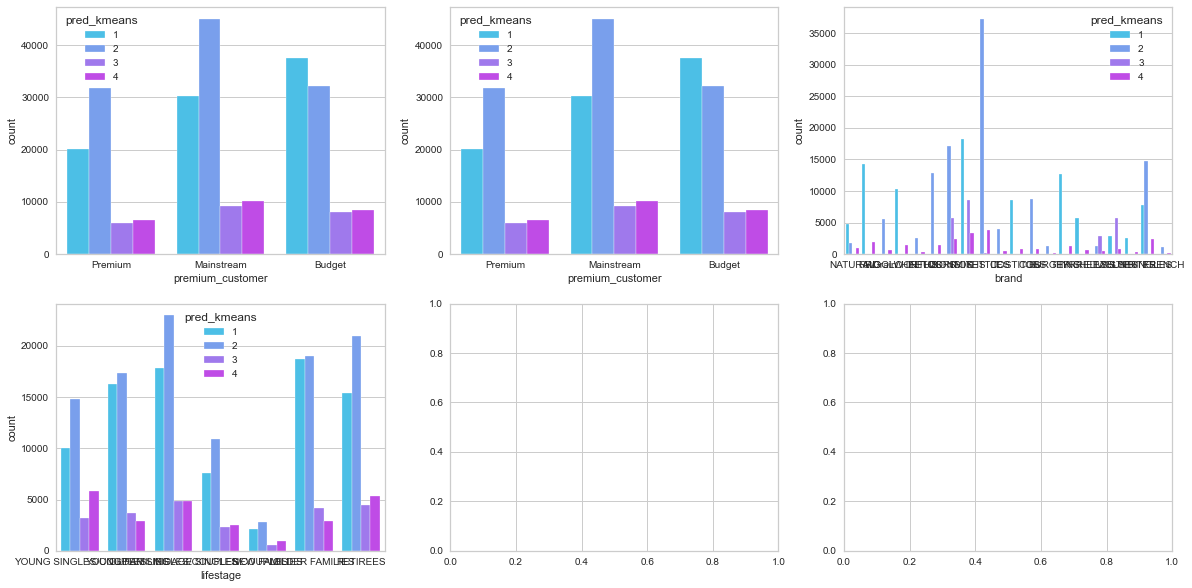

In [58]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(personal,ax.flatten()):
    sns.countplot(df[variable],hue=df['pred_kmeans'],ax=subplot,palette='cool')

In [59]:
other = df[['prod_nbr','tot_sales','pack_size','prod_qty','store_nbr']]

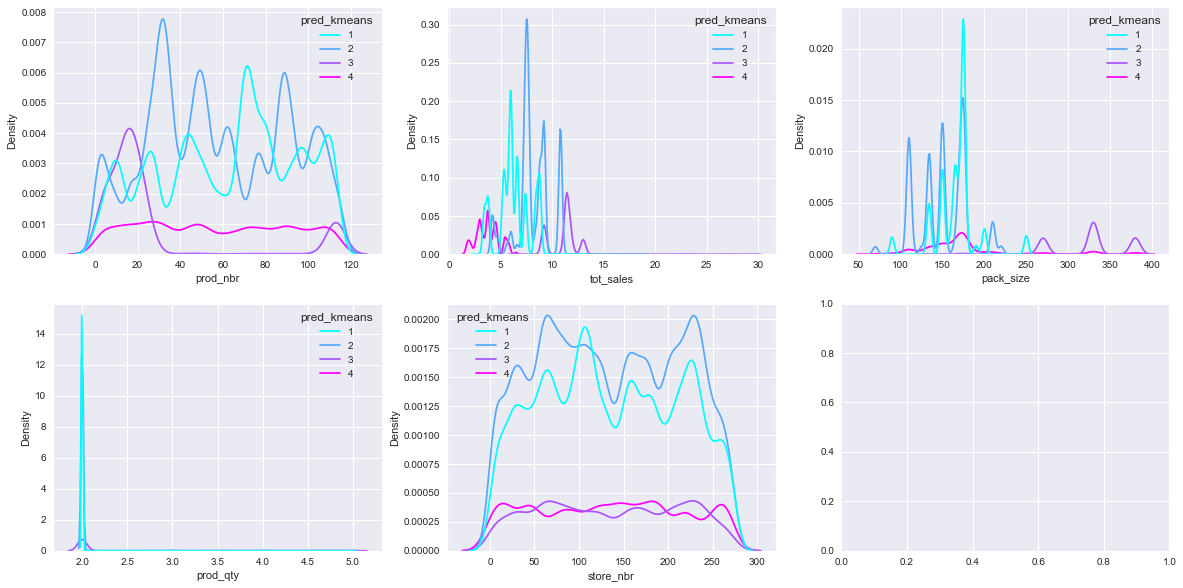

In [60]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(other,ax.flatten()):
    sns.kdeplot(data= df,x=variable,hue='pred_kmeans',ax=subplot,palette='cool')

In [61]:
 df.to_excel('done_quanr.xlsx', index=False)